<font size=6> <b> SMU Lab Two - MSDS7331 - Machine Learning-1 </b> </font>

<font size=5> <b> Summer 2020 Group - Sachin, Ikenna, Edgar, Dustin </b></font> 




<img src="https://github.com/sachinac/ML7331/blob/master/data/data_mining.jpg?raw=true"> 

<p align="center"><font size=5> <b> Health Care Fraud Detection  </b></font> </p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1">Import Libraries</a></span></li><li><span><a href="#Data-Preparation-Part-1" data-toc-modified-id="Data-Preparation-Part-1-2">Data Preparation Part 1</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2.1">Load Data</a></span></li><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-2.2">Categorical Variables</a></span></li><li><span><a href="#Float-Variables" data-toc-modified-id="Float-Variables-2.3">Float Variables</a></span></li><li><span><a href="#Integer-Variables" data-toc-modified-id="Integer-Variables-2.4">Integer Variables</a></span></li><li><span><a href="#Dates-Variables" data-toc-modified-id="Dates-Variables-2.5">Dates Variables</a></span></li><li><span><a href="#Recoding" data-toc-modified-id="Recoding-2.6">Recoding</a></span></li><li><span><a href="#Dataframe" data-toc-modified-id="Dataframe-2.7">Dataframe</a></span></li><li><span><a href="#All-Features" data-toc-modified-id="All-Features-2.8">All Features</a></span></li><li><span><a href="#Target-Variable" data-toc-modified-id="Target-Variable-2.9">Target Variable</a></span></li><li><span><a href="#One-Hot-Encoding-using-Pandas" data-toc-modified-id="One-Hot-Encoding-using-Pandas-2.10">One Hot Encoding using Pandas</a></span></li><li><span><a href="#Remove-None-columns" data-toc-modified-id="Remove-None-columns-2.11">Remove None columns</a></span></li><li><span><a href="#MinMaxScaler" data-toc-modified-id="MinMaxScaler-2.12">MinMaxScaler</a></span></li></ul></li><li><span><a href="#Data-Preparation-Part-2" data-toc-modified-id="Data-Preparation-Part-2-3">Data Preparation Part 2</a></span><ul class="toc-item"><li><span><a href="#Final-DataSet" data-toc-modified-id="Final-DataSet-3.1">Final DataSet</a></span></li><li><span><a href="#Sparse-Matrix" data-toc-modified-id="Sparse-Matrix-3.2">Sparse Matrix</a></span></li><li><span><a href="#Train-and-Test-split" data-toc-modified-id="Train-and-Test-split-3.3">Train and Test split</a></span></li></ul></li><li><span><a href="#Modeling-and-Evaluations-1" data-toc-modified-id="Modeling-and-Evaluations-1-4">Modeling and Evaluations 1</a></span></li><li><span><a href="#Modeling-and-Evaluations-2" data-toc-modified-id="Modeling-and-Evaluations-2-5">Modeling and Evaluations 2</a></span></li><li><span><a href="#Modeling-and-Evaluations-3" data-toc-modified-id="Modeling-and-Evaluations-3-6">Modeling and Evaluations 3</a></span><ul class="toc-item"><li><span><a href="#Create-Models" data-toc-modified-id="Create-Models-6.1">Create Models</a></span></li></ul></li><li><span><a href="#Modeling-and-Evaluations-4" data-toc-modified-id="Modeling-and-Evaluations-4-7">Modeling and Evaluations 4</a></span></li><li><span><a href="#Modeling-and-Evaluations-5" data-toc-modified-id="Modeling-and-Evaluations-5-8">Modeling and Evaluations 5</a></span></li><li><span><a href="#Modeling-and-Evaluations-6" data-toc-modified-id="Modeling-and-Evaluations-6-9">Modeling and Evaluations 6</a></span></li><li><span><a href="#Deployment" data-toc-modified-id="Deployment-10">Deployment</a></span></li><li><span><a href="#Exceptional-Work" data-toc-modified-id="Exceptional-Work-11">Exceptional Work</a></span></li><li><span><a href="#References" data-toc-modified-id="References-12">References</a></span></li></ul></div>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import timeit

from sklearn import metrics
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import csc_matrix
from math import sqrt


# Data Preparation Part 1

## Load Data

Load data into memory. EDA was already performed on this data. We had originally received Beneficiary, Encounters and target variable datasets in three different spreadsheets and EDA combined that into single spreadsheet using keys of the tables. We still need to perform some additional operations before we actually start with modeling. So in first we prepare our data for modeling as follows :
* Prepare variables. Setup data type correctly.
* Remove unnecessary variables
* Transform categorical features into dummy variables 
* Feature selection.

Lets first print the information of this dataframe. As we can see from below dataframe info this data has total of 79 features. We definately dont need all features. This step will process some of the features before we actually use this data for modeling.

In [2]:
lab2_df = pd.read_csv('data/final_fraud_dataset.csv',index_col=0)

## Set Categorical Variables

Following are nominal categorical attributes. Pandas requires these to be datatype of 'object' or 'category'. We are setting nominal categorical variables as 'object'. Here is the list of categorical variables :

* Race
* Gender
* RenalDiseaseIndicator
* State
* County
* AttendingPhysicianPresent
* OtherPhysicianPresent
* OperatingPhysicianPresent
* 11 Chronic Conditions



In [3]:
cat_preds = ['Gender','Race','RenalDiseaseIndicator','State','County',
                     'NoOfMonths_PartACov','NoOfMonths_PartBCov',
                     'ChronicCond_Alzheimer','ChronicCond_Heartfailure',
                     'ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
                     'ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
                     'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke',
                     'Alive','ClmAdmitDiagnosisCode','DiagnosisGroupCode',
                     'ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3',
                     'ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6',
                     'ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9',
                     'ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2',
                     'ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5',
                     'AttendingPhysicianPresent','OtherPhysicianPresent','OperatingPhysicianPresent']

lab2_df[cat_preds]   = lab2_df[cat_preds].astype('object')


## Set Float Variables

Following varibles are required to be datatype of floating point. These are amounts and hence it makes sense to changt it's type to float

* InscClaimAmtReimbursed
* IPAnnualReimbursementAmt
* IPAnnualDeductibleAmt


In [4]:
float_preds = ['InscClaimAmtReimbursed','IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt']

lab2_df[float_preds]   = lab2_df[float_preds].astype('float')

## Set Integer Variables

These variables contains all numbers but they are actually nominal categorical attributes. They are all binary in nature. So we can keep them as integer as we will be converting this dataset into sparse matrix for model building exercise. 

Following variables will be set as integer data type :
* NoOfMonths_PartACov - Number of months of Medicare part A coverage
* NoOfMonths_PartBCov - Number of months of Medicare part B coverage


In [5]:
int_preds = ['NoOfMonths_PartACov', 
             'NoOfMonths_PartBCov']

lab2_df[int_preds] = lab2_df[int_preds].astype(int)

## Set Date Variables

Following are new attributes are derived from existing attritbutes of type dates. All date attributes are converted to the proleptic Gregorian ordinal of a date.In simple terms datetime.toordinal() returns the day count from the date 01/01/01


* ORD_DOD - Set ORD_DOD to open end date where date is not available to indicate that Beneficiary is alive
* ORD_DOB 
* ORD_ClaimStartDt
* ORD_ClaimEndDt
* ORD_AdmissionDt
* ORD_DischargeDt


In [6]:
dte_preds = ['ClaimStartDt', 'ClaimEndDt','AdmissionDt', 'DischargeDt', 'DOB','DOD']

# Regex to normalize integer DOB/DOD as ISO dates
lab2_df['DOB'] = lab2_df['DOB'].astype(str).str.replace('(\d{4})(\d\d)(\d\d)', '\\1-\\2-\\3', regex=True) 
lab2_df['DOD'] = lab2_df['DOD'].astype(str).str.replace('(\d{4})(\d\d)(\d\d)', '\\1-\\2-\\3', regex=True) 

lab2_df['ORD_DOD'] = lab2_df['DOD']
lab2_df['ORD_DOD'] = lab2_df['ORD_DOD'].replace('0','2199-12-31')

lab2_df['ORD_DOD'] = pd.to_datetime(lab2_df['ORD_DOD'],format='%Y-%m-%d').apply(dt.datetime.toordinal)
lab2_df['ORD_DOB'] = pd.to_datetime(lab2_df['DOB'],format='%Y-%m-%d').apply(dt.datetime.toordinal)
lab2_df['ORD_ClaimStartDt'] = pd.to_datetime(lab2_df['ClaimStartDt'],format='%Y-%m-%d').apply(dt.datetime.toordinal)
lab2_df['ORD_ClaimEndDt']   = pd.to_datetime(lab2_df['ClaimEndDt'],format='%Y-%m-%d').apply(dt.datetime.toordinal)
lab2_df['ORD_AdmissionDt']  = pd.to_datetime(lab2_df['AdmissionDt'],format='%Y-%m-%d').apply(dt.datetime.toordinal)
lab2_df['ORD_DischargeDt']  = pd.to_datetime(lab2_df['DischargeDt'],format='%Y-%m-%d').apply(dt.datetime.toordinal)

ord_dte_preds = ['ORD_DOD', 'ORD_DOB','ORD_ClaimStartDt', 'ORD_ClaimEndDt', 'ORD_AdmissionDt','ORD_DischargeDt']


## Recoding Binary and Categorical Features

All chronic conditions, Gender, RenalDiseaseIndicator are binary variables i.e. they all have just two values but values are not 0 and 1. e.g. Gender has values 1 or 2, RenalDiseaseIndicator has Y or 1 and all Chronic Conditions has values 1 or 2. 

We will recode these values to 0 or 1 instead of 1 and 2 for modeling purpose. Leaving two columns for a binary feature can introduce bias, giving one feature artificially more weight in prediction if the model treats the single feature as two.


In [7]:
# Recode below categorical variables 

lab2_df['Gender']  = lab2_df['Gender'].replace([1,2],[0,1])
lab2_df['RenalDiseaseIndicator']  = lab2_df['RenalDiseaseIndicator'].replace('Y',1)


lab2_df = lab2_df.replace({'ChronicCond_Alzheimer': 2,      'ChronicCond_Heartfailure': 2, 
                           'ChronicCond_KidneyDisease': 2,  'ChronicCond_Cancer': 2, 
                           'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2,       'ChronicCond_IschemicHeart': 2, 
                           'ChronicCond_Osteoporasis': 2,   'ChronicCond_rheumatoidarthritis': 2, 
                           'ChronicCond_stroke': 2 }, '0')

lab2_df['Gender'] = lab2_df['Gender'].astype('object')
lab2_df['Race'] = lab2_df['Race'].astype('object')
lab2_df['State'] = lab2_df['State'].astype('object')
lab2_df['County'] = lab2_df['County'].astype('object')
lab2_df['OtherPhysicianPresent'] = lab2_df['OtherPhysicianPresent'].astype('object')
lab2_df['OperatingPhysicianPresent'] = lab2_df['OperatingPhysicianPresent'].astype('object')
lab2_df['AttendingPhysicianPresent'] = lab2_df['AttendingPhysicianPresent'].astype('object')



## Final Dataframe - All Features
All features are GROUPED as follows:
* Numeric Predictors
* Categorical Predictors
* Non-Predictors (Will not be used for modeling)

We chose to remove all ID columns from the data, as they aren't useful in prediction (unique IDs = N observations).  We replaced the original date features with their ordinal conversions.  We removed all providerIDs from the dataset, because these are correlated 1:1 with the response.  Unfortunately, our data lists only the provider ID as the response variable (potentially fraudulent), so the prediction algorithm gets 'the answer' if the provider ID shows up in attending, operating, or other physician columns.  Removing these from the dataset limits the prediction ability of our algorithms, but more closely represents reality, where a provider's fraudulent behavior is unknown at the time of claim review.


In [8]:
numeric_preds     = ['Age','NoPhysician','NoOfDiag','NoOfProc',
                     'ORD_DOD','ORD_DOB','ORD_ClaimStartDt','ORD_ClaimEndDt',
                     'ORD_AdmissionDt','ORD_DischargeDt','DaysAdmitted',
                     'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',   
                     'InscClaimAmtReimbursed'  
                    ]

cat_preds_nominal = ['Gender','Race','RenalDiseaseIndicator','State','County',
                     'NoOfMonths_PartACov','NoOfMonths_PartBCov',
                     'ChronicCond_Alzheimer','ChronicCond_Heartfailure',
                     'ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
                     'ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
                     'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke',
                     'Alive','ClmAdmitDiagnosisCode','DiagnosisGroupCode',
                     'ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3',
                     'ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6',
                     'ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9',
                     'ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2',
                     'ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5',
                     'AttendingPhysicianPresent','OtherPhysicianPresent','OperatingPhysicianPresent'
                     ]

non_preds = ['BeneID','DOB','DOD','state_usps','ClaimID',
             'ClaimStartDt','ClaimEndDt','Provider',
             'AttendingPhysician','OperatingPhysician','OtherPhysician',
             'AdmissionDt','DischargeDt','DRGDesc',
             'ProcedureShortDesc_1','ProcedureShortDesc_2','ProcedureShortDesc_3',
             'ProcedureShortDesc_4','ProcedureShortDesc_5','DiagnosticDesc_1',
             'DiagnosticDesc_2','DiagnosticDesc_3','DiagnosticDesc_4',
             'DiagnosticDesc_5','DiagnosticDesc_6','DiagnosticDesc_7',
             'DiagnosticDesc_8','DiagnosticDesc_9','DiagnosticDesc_10',
             'NoOfChronicCondition'
             ]

preds_in_model = numeric_preds + cat_preds_nominal

Xlab2_df = lab2_df[preds_in_model]



## Set Target Variable

In [9]:
target_df = lab2_df['PotentialFraud'].replace(['Yes','No'],[1,0]).values

## One Hot Encoding using SciKit Learn Multi Label Binarizer

Because the claim data can have up to 10 different diagnosis codes and 5 different procedure codes, we created a new array column that combines all used diagnosis codes and another like type column with procedures.  This will reduce our feature counts from >40,000 to around 9,000 and will help maximize feature importance because each code will no longer be split across up to 10 different columns (i.e. diagnosis code columns 1 - 10).  This way if code A gets used in column_1, and in column_2, the usage of code A will be consolidated to the DiagnosisCode_A column.

Pandas get_dummies function will not parse lists, we'll need to utilize the multiLabelBinarizer from scikit learn to one-hot encode the list values before calling get_dummies.

In [10]:

Xlab2_df['DiagnosisCode'] = Xlab2_df[['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']].values.tolist()
Xlab2_df['ProcedureCode'] = Xlab2_df[['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5']].values.tolist()


ipdata = Xlab2_df.copy()

mlb = MultiLabelBinarizer()
ipdata = ipdata.join(pd.DataFrame(mlb.fit_transform(ipdata['ProcedureCode']),columns='ProcedureCode_'+mlb.classes_))
ipdata = ipdata.join(pd.DataFrame(mlb.fit_transform(ipdata['DiagnosisCode']),columns='DiagnosisCode_'+mlb.classes_))

ipdata = ipdata.drop(columns=['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10','ProcedureCode','DiagnosisCode'])


/home/dustin/anaconda3/envs/DS7331/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dustin/anaconda3/envs/DS7331/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## One Hot Encoding using Pandas

Now that we've dropped our multi-columns and lists, we can onehot encode the rest of the features and transform into a sparse matrix using Pandas Get Dummies function.

In [11]:
ipdata = pd.get_dummies(ipdata, sparse=True)

In [12]:
ipdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Columns: 9095 entries, Age to OperatingPhysicianPresent_1
dtypes: Sparse[uint8, 0](3040), float64(3), int64(6052)
memory usage: 1.8 GB


## Post-processing Encoded Features

Because we are using objects, Pandas converts all classes into new columns.  However, for binary features, we want to remove one of the values, in order to prevent the model from introducing bias by weighting each binary feature twice (via separate true/false columns).

To correct this, we must search for and remove duplicate columns (indicated by the _0 suffix).


In [13]:
StopWords = ['Diagnosis','Procedure','County','State']
bins = []
print('Removed Following Columns:')
for col in ipdata.columns:
    if not any(word in col for word in StopWords) and '_0' in col:    
        print(col)
        bins.append(col)
ipdata = ipdata.drop(bins, axis=1)

Removed Following Columns:
Gender_0
RenalDiseaseIndicator_0
ChronicCond_Alzheimer_0
ChronicCond_Heartfailure_0
ChronicCond_KidneyDisease_0
ChronicCond_Cancer_0
ChronicCond_ObstrPulmonary_0
ChronicCond_Depression_0
ChronicCond_Diabetes_0
ChronicCond_IschemicHeart_0
ChronicCond_Osteoporasis_0
ChronicCond_rheumatoidarthritis_0
ChronicCond_stroke_0
AttendingPhysicianPresent_0
OtherPhysicianPresent_0
OperatingPhysicianPresent_0


## Remove 'None' columns

Our encoded dataset contains None for Diagnosis and Procedure codes features wherever information is not available on the claim. All claims allows max 5 procedure codes and 10 diagnosis codes and at least one procedure code or diagnosis code is applied on the claim. When claim has only one procedure and one diagnosis all other procedure codes contains NAs or None and one hot encoding treats these as another category which is not correct. therefore we need to remove column Nones created by one hot encoding by pandas.

Essentially by creating a 'none' column it creates a column (new feature) for missing data, which would erroneously assign more weight to a value that doesn't exist.  Because it would get a '1' for missing a value, but would also have 0's for the other values.  Also it may mess up our counts because 'None' would count as a valid procedure code if we're summing unique values for each column.

In [14]:
nones = []
print('Removed Following Columns:')
for col in ipdata.columns:
    if 'None' in col:    
        nones.append(col)
        print(col)
ipdata = ipdata.drop(nones, axis=1)

Removed Following Columns:
ProcedureCode_None
DiagnosisCode_None


In [15]:
ipdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Columns: 9077 entries, Age to OperatingPhysicianPresent_1
dtypes: Sparse[uint8, 0](3024), float64(3), int64(6050)
memory usage: 1.8 GB


In [16]:
# Stash an unscaled copy of the target column, and the dataframe
reg_target = ipdata['InscClaimAmtReimbursed']
reg_df = ipdata.drop(columns=['InscClaimAmtReimbursed'])

## MinMaxScaler

We decided to use the MinMaxScaler here instead of the standard scaler because we're using a sparse matrix of mostly binary features.  Because we do have some true numeric features, such as: deductible amount, age, the converted ordinal dates, claim dollar amounts etc, these may end up having values outside the bounds of 0 and 1.  A zero mean scaler doesn't make sense with this data because it would cause the numeric features to have inflated importance if observations end up being several standard deviations away from 0, while the binary features are capped at 1.  The minMax scaler allows us to force all values in the dataset to live within the bounds of 0 and 1, allowing our logistic regression algorithms to weight features appropriately using similar measures.

For regression, we must also scale the response variable, so that we can correctly predict against 

In [17]:
scaler = MinMaxScaler()
scaler.fit(ipdata)
X1 = scaler.transform(ipdata)

#reg_scaler = MinMaxScaler()
#reg_scaler.fit(reg_df)
#X1 = scaler.transform(reg_df)

#scaler = MinMaxScaler()
#scaler.fit(ipdata)
#X1 = scaler.transform(ipdata)

# Data Preparation Part 2

We ended up with two variants of our final dataset: the sparse matrix (ipdata) containing all one-hot encoded features, and the original dataframe (Xlab2_df) so that if we need to retrieve any of the original data, we can share indices to highlight our findings.

## Final DataSet

In [18]:
Xlab2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              40474 non-null  int64  
 1   NoPhysician                      40474 non-null  int64  
 2   NoOfDiag                         40474 non-null  int64  
 3   NoOfProc                         40474 non-null  int64  
 4   ORD_DOD                          40474 non-null  int64  
 5   ORD_DOB                          40474 non-null  int64  
 6   ORD_ClaimStartDt                 40474 non-null  int64  
 7   ORD_ClaimEndDt                   40474 non-null  int64  
 8   ORD_AdmissionDt                  40474 non-null  int64  
 9   ORD_DischargeDt                  40474 non-null  int64  
 10  DaysAdmitted                     40474 non-null  int64  
 11  IPAnnualReimbursementAmt         40474 non-null  float64
 12  IPAnnualDeductible

In [19]:
Xlab2_df

,Age,NoPhysician,NoOfDiag,NoOfProc,ORD_DOD,ORD_DOB,ORD_ClaimStartDt,ORD_ClaimEndDt,ORD_AdmissionDt,ORD_DischargeDt,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,AttendingPhysicianPresent,OtherPhysicianPresent,OperatingPhysicianPresent,DiagnosisCode,ProcedureCode
0,66,1,9,0,803168,709301,733509,733515,733509,733515,...,None,None,None,None,None,1,0,0,"[1970, 4019, 5853, 7843, 2768, 71590, 2724, 19...","[None, None, None, None, None]"
1,95,3,9,2,803168,698678,733427,733439,733427,733439,...,7769.0,5849.0,None,None,None,1,1,1,"[4240, 2639, 2948, 40390, 45821, 28489, 5854, ...","[7769.0, 5849.0, None, None, None]"
2,87,2,9,1,803168,701904,733697,733715,733697,733715,...,9338.0,None,None,None,None,1,0,1,"[V5789, 4168, 73313, 7812, 7993, 78830, 72273,...","[9338.0, None, None, None, None]"
3,79,3,7,1,803168,704734,733705,733709,733705,733709,...,8154.0,None,None,None,None,1,1,1,"[71535, 71960, 4019, V1202, 4240, 2449, 2768, ...","[8154.0, None, None, None, None]"
4,83,2,1,1,803168,702970,733415,733419,733415,733419,...,8543.0,None,None,None,None,1,0,1,"[2330, None, None, None, None, None, None, Non...","[8543.0, None, None, None, None]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,57,3,9,1,803168,712648,733582,733589,733582,733589,...,9955.0,None,None,None,None,1,1,1,"[78079, 45341, V1251, 41401, 2449, 2930, 78830...","[9955.0, None, None, None, None]"
40470,66,3,9,1,803168,709360,733656,733663,733656,733663,...,3326.0,None,None,None,None,1,1,1,"[486, 7905, V5867, 5990, 2859, 7904, 49121, 41...","[3326.0, None, None, None, None]"
40471,70,1,9,0,803168,708174,733726,733734,733726,733734,...,None,None,None,None,None,1,0,0,"[42821, E9342, 42731, 5856, 4280, 5859, 51881,...","[None, None, None, None, None]"
40472,51,2,8,1,803168,714719,733430,733430,733430,733430,...,9390.0,None,None,None,None,1,0,1,"[41071, 78552, 5856, V4581, 5789, 39891, 40390...","[9390.0, None, None, None, None]"


In [20]:
Xlab2_df.describe()

,Age,NoPhysician,NoOfDiag,NoOfProc,ORD_DOD,ORD_DOB,ORD_ClaimStartDt,ORD_ClaimEndDt,ORD_AdmissionDt,ORD_DischargeDt,DaysAdmitted,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,InscClaimAmtReimbursed,NoOfMonths_PartACov,NoOfMonths_PartBCov
count,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000
mean,73.181598,1.701883,8.087365,0.733607,802621.757573,706684.599867,733577.740698,733583.400949,733577.734867,733583.400035,6.665168,17528.645056,1887.461234,10087.884074,11.915402,11.922642
std,13.187784,0.618905,1.851830,0.761113,6138.365984,4812.387520,104.884925,104.658338,104.888036,104.659525,5.638538,17562.156402,1686.848629,10303.099402,0.987961,0.879923
min,25.000000,0.000000,1.000000,0.000000,733439.000000,696883.000000,733373.000000,733408.000000,733373.000000,733408.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,1.000000,8.000000,0.000000,803168.000000,703426.000000,733486.000000,733492.000000,733486.000000,733492.000000,3.000000,6000.000000,1068.000000,4000.000000,12.000000,12.000000
50%,74.000000,2.000000,9.000000,1.000000,803168.000000,706287.000000,733574.000000,733580.000000,733574.000000,733580.000000,5.000000,12000.000000,1068.000000,7000.000000,12.000000,12.000000
75%,82.000000,2.000000,9.000000,1.000000,803168.000000,708905.000000,733667.000000,733673.000000,733667.000000,733673.000000,8.000000,22000.000000,2136.000000,12000.000000,12.000000,12.000000
max,101.000000,3.000000,10.000000,5.000000,803168.000000,724245.000000,733772.000000,733772.000000,733772.000000,733772.000000,36.000000,161470.000000,38272.000000,125000.000000,12.000000,12.000000


# Modeling and Evaluation 1

## Task 1: Classification - Provider Fraud
We will predict possible fraudulent claims and measure effectiveness using 10-fold cross validation and focus on attaining high metrics in F-1, recall and precision, in that order. Precision measures the percentage of fraudulent predictions which are truly fraudulent, and recall measures the total percentage of fraudulent claims correctly identified. These two metrics have been identified as most appropriate, due to our objective of correctly identifying fraudulent claims.  We want a high recall score, but not at the expense of precision (we can get 100% recall by classifying everyone as fraudulent).  F-1 should give us a good balance between the two, as they have an inverse relationship, where increasing one often decreases the other. 

## Task 2: Regression 
__TODO:__

# Modeling and Evaluation 2

## Sparse Matrix Conversion and Test/Train Split
The minMax Scaler returns a dense numpy array.  Because we have so many features, we need to transform the data back into a sparse matrix for efficient . **CSC(Compressed Sparse Column)** is more efficient at accessing column-vectors or column operations, generally, as it is stored as arrays of columns and their value at each row.

We chose to scale, convert to sparse and do test/train splits all before our pipeline in order to save processing time in the pipeline and grid search model execution steps.  The scaler takes a few minutes, and we don't want to introduce this lag to the repetitive pipeline.  This also gives us the advantage of using the exact same test/train splits for all models for a fair evaluation.  

## Cross Validation Method

We're using 10 fold cross validation because it will utilize it's own splits of the training data and help to ensures we don't overfit to the training data, in addition to witholding test data entirely from the models so we can more effectively evaluate generalization ability on a dataset that hasn't been seen by our models.  It has another benefit of using 10 different test/train splits of the training data, so if we happen by chance to get the best possible prediction outcome the first time we run it, we have 9 more chances to even out our prediction metrics using an average of the 10 runs.  This greatly increases our confidence that we are correctly reporting model performance metrics. 

In [21]:
# Save a copy of the scaled regression dataframe & target
reg_X1 = pd.DataFrame(X1, columns = ipdata.columns).drop(columns=['InscClaimAmtReimbursed'])
scaled_reg_target = pd.DataFrame(X1, columns = ipdata.columns)['InscClaimAmtReimbursed']

# Convert to Sparse
X = csc_matrix(X1)
reg_X = csc_matrix(reg_X1)


In [22]:
from scipy.sparse import save_npz

save_npz('X.csv',X)

In [88]:

X_train,X_test,y_train,y_test = train_test_split(X,target_df,test_size=0.2,random_state=86)

reg_X_train,reg_X_test,reg_y_train,reg_y_test = train_test_split(reg_X,scaled_reg_target,test_size=0.2,random_state=86)

# Modeling and Evaluations 3

## Create Models

### Classification Models 
#### Logistic regression
* For logistic regression 
#### Random Forest

#### Naive Bayes

### Regression Models
#### Multiple Linear Regression
#### Random Forest
#### kNN

Below is a helper function designed to help test our models after hypertuning.  It takes a pipeline object and a parameter array and executes the grid search, as well as running a new cross validation and confusion matrix on the test data that we withheld from the training set.

First it creates a cross validation object, with 10-fold cross validation and an 80/20 test split.  Next it fits our training data to the model(s) listed in the grid, then it executes each model once for each combination of parameters given in the parameter array.  After obtaining the results, it displays the metrics data we defined (ROC, Accuracy, Precision, Recall and F1), with the best model being chosen with the highest F1 score.  After displaying these results, it performs 10 fold cross validation on the test data (witheld from the training data) to see how well the model performs on new data outside of the training set.  We then create a confusion matrix which can highlight models that look good on paper (high scores), but are actually poor performers.  We see this in cases where recall gets really great scores, but the vast majority of claims get classified as fraudulent, which is not realistic.  

In [22]:
def testPerformance(pipeline, params):
    
    cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=86)
    
    #Perform the grid search using accuracy as a metric during cross validation.
    grid = GridSearchCV(pipeline, params, cv=cv, scoring=['roc_auc','accuracy','f1','recall','precision'], n_jobs=-1, refit='f1')
    #Use the best features from recursive feature elimination during the grid search
    start_time = timeit.default_timer()
    grid.fit(X_train, y_train)
    grid_time = timeit.default_timer() - start_time
    #display the best pipeline model identified during the grid search
    print("\ngrid time: ", grid_time)

    gridResults = pd.DataFrame.from_dict(grid.cv_results_)
    
    fileName = str(grid.best_estimator_[0]).split('(')[0]+'_CV_Results.xlsx'
    gridResults.to_excel(fileName)
    
    
    fewResults = pd.DataFrame(grid.cv_results_)[['params','mean_fit_time','mean_test_roc_auc',"mean_test_accuracy","mean_test_precision","mean_test_recall","mean_test_f1"]].dropna()
    display(fewResults.sort_values(by='mean_test_f1'))
    
    start_time = timeit.default_timer()

    clf = grid.best_estimator_[0]
    # fit the model
    clf.fit(X_train,y_train)

    fit_time = timeit.default_timer() - start_time

    # do 10-fold cross validation:
    f1scores = cross_val_score(clf, X_test, y_test, cv=cv, scoring='f1', n_jobs=-1)
    PreScores = cross_val_score(clf, X_test, y_test, cv=cv, scoring='precision', n_jobs=-1)
    RecScores = cross_val_score(clf, X_test, y_test, cv=cv, scoring='recall', n_jobs=-1)
    print('\n10-fold Cross Validation results:')
    print('---------------------------------')
    print('F1 scores:', f1scores)
    print('\nPrecision scores', PreScores)
    print('\nRecall scores', RecScores)

    print('\nAverage F1: ',np.average(f1scores))
    print('Min F1: ',np.min(f1scores))
    print('Max F1: ',np.max(f1scores))
    print('\nAverage Precision: ',np.average(PreScores))
    print('Min Precision: ',np.min(PreScores))
    print('Max Precision: ',np.max(PreScores))
    print('\nAverage Recall: ',np.average(RecScores))
    print('Min Recall: ',np.min(RecScores))
    print('Max Recall: ',np.max(RecScores))

    cv_time = timeit.default_timer() - start_time - fit_time

    # Build Confusion Matrix to test generality:
    y_pred=clf.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Potential Fraud Confusion matrix', y=1.1)
    plt.ylabel('Actual Fraud')
    plt.xlabel('Predicted Fraud')
    plt.show
    print('\nSingle Run results:')
    print('---------------------------------')
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("F1:",metrics.f1_score(y_test, y_pred))
    
    print("\nFit time: ", fit_time)
    print("CV time: ", cv_time)
    print("Total time: ", timeit.default_timer() - start_time)
    return(grid)

Set up pipe for logistic regression hyper parameter tuning


grid time:  419.77436868601944


,params,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
1,"{'logisticregression__C': 0.001, 'logisticregr...",0.112866,0.500000,0.424583,0.000000,0.000000,0.000000
145,"{'logisticregression__C': 1000, 'logisticregre...",58.634833,0.573268,0.565426,0.631108,0.589354,0.609447
121,"{'logisticregression__C': 100, 'logisticregres...",83.907564,0.577911,0.567495,0.632985,0.591313,0.611369
148,"{'logisticregression__C': 1000, 'logisticregre...",92.786063,0.576350,0.566955,0.631214,0.595389,0.612700
147,"{'logisticregression__C': 1000, 'logisticregre...",30.908189,0.582514,0.569503,0.633964,0.596200,0.614430
149,"{'logisticregression__C': 1000, 'logisticregre...",11.371463,0.581221,0.568993,0.633015,0.597416,0.614635
124,"{'logisticregression__C': 100, 'logisticregres...",37.429099,0.583644,0.569951,0.634519,0.596094,0.614635
123,"{'logisticregression__C': 100, 'logisticregres...",31.346915,0.585191,0.570337,0.634932,0.596253,0.614912
125,"{'logisticregression__C': 100, 'logisticregres...",9.562209,0.585913,0.571387,0.635803,0.597452,0.615964
97,"{'logisticregression__C': 10, 'logisticregress...",36.737785,0.592474,0.574506,0.639731,0.596743,0.617410



10-fold Cross Validation results:
---------------------------------
F1 scores: [0.72268245 0.72870043 0.72569854 0.73416732 0.7216739  0.71660721
 0.72670075 0.73565014 0.70944599 0.7454475 ]

Precision scores [0.56578135 0.57319333 0.56948734 0.57998765 0.56454602 0.55836936
 0.57072267 0.58184064 0.54972205 0.59419395]

Recall scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Average F1:  0.7266774237036513
Min F1:  0.7094459944200877
Max F1:  0.7454475009686168

Average Precision:  0.5707844348363187
Min Precision:  0.5497220506485485
Max Precision:  0.5941939468807906

Average Recall:  1.0
Min Recall:  1.0
Max Recall:  1.0

Single Run results:
---------------------------------
Accuracy: 0.574922791846819
Precision: 0.5746166313427253
Recall: 0.99374730487279
F1: 0.7281775811675488

Fit time:  0.9061228799982928
CV time:  1.5183906280435622
Total time:  2.5528147339937277


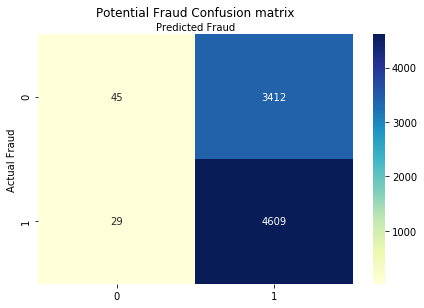

In [46]:
"""Dustin's Pipe/Grid:  Currently takes about 30s.  Testing params"""

LogPipe = make_pipeline(LogisticRegression())

LogParams = {'logisticregression__penalty':['l1','l2','None','elastic-net']
              ,'logisticregression__C': [.001, .01, .1, 1, 10, 100, 1000]
              ,'logisticregression__class_weight': ['balanced','None']
              ,'logisticregression__random_state': [86]
              ,'logisticregression__solver': ['sag','liblinear','lbfgs']
              ,'logisticregression__max_iter':[500]
              ,'logisticregression__n_jobs':[-1]
             }

LogGrid = testPerformance(LogPipe, LogParams)


In [47]:
# view available metrics:
print(sorted(metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


In [ ]:
# make sure model & results come back as expected
print(LogGrid.best_estimator_)
display(LogGrid.cv_results_)

Using our best tuning from the grid search, let's test performance of logistic regression on a new dataset to test generalization:

In [49]:
# summarize feature importance
zip_vars = zip(ipdata.columns,LogGrid.best_estimator_[0].coef_.T) # combine attributes
FeatureWeights = pd.DataFrame(list(zip_vars), columns=['Feature', 'Weight'])

FeatureWeights.sort_values(by='Weight')

,Feature,Weight
17,OtherPhysicianPresent,[-0.19267174238171256]
6100,State_39,[-0.11622124066356589]
6089,State_28,[-0.0866071282906229]
6072,State_11,[-0.08212221985902712]
6062,State_1,[-0.08170743659812331]
...,...,...
6108,State_49,[0.08241429051644562]
6068,State_7,[0.08484900940272519]
6094,State_33,[0.10470001917179776]
6141,County_160,[0.111454329173663]


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
#pipe = Pipeline([('classifier' , RandomForestClassifier())])
pipe = Pipeline([('classifier' , LogisticRegression())])
scoring = {'AUC': 'roc_auc', 'Recall': make_scorer(accuracy_score),'Precision': make_scorer(accuracy_score)}
scores = ['precision', 'recall']
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    #'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__C' : np.logspace(-4, 4),
    'classifier__solver' : ['liblinear']},
     {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
     'classifier__n_estimators' : list(range(10,101)),
    #'classifier__max_features' : list(range(6,32,5))}
     'classifier__max_features' : list(range(6,32))}
]
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1,scoring=scoring,refit='AUC')

best_clf = clf.fit(X_train, y_train)

#best_clf.best_estimator_


grid time:  140.70304446603404


,params,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'randomforestclassifier__max_depth': 5, 'rand...",1.765320,0.641991,0.575417,0.575417,1.000000,0.730466
1,"{'randomforestclassifier__max_depth': 5, 'rand...",3.441620,0.649502,0.575417,0.575417,1.000000,0.730466
2,"{'randomforestclassifier__max_depth': 5, 'rand...",8.597043,0.655021,0.575417,0.575417,1.000000,0.730466
4,"{'randomforestclassifier__max_depth': 10, 'ran...",5.673204,0.661141,0.575417,0.575417,1.000000,0.730466
5,"{'randomforestclassifier__max_depth': 10, 'ran...",13.926310,0.664981,0.575417,0.575417,1.000000,0.730466
3,"{'randomforestclassifier__max_depth': 10, 'ran...",3.348129,0.653884,0.575448,0.575435,1.000000,0.730480
8,"{'randomforestclassifier__max_depth': 15, 'ran...",19.765389,0.672251,0.576143,0.575846,0.999892,0.730781
7,"{'randomforestclassifier__max_depth': 15, 'ran...",7.590671,0.668713,0.576467,0.576043,0.999757,0.730905
6,"{'randomforestclassifier__max_depth': 15, 'ran...",4.780892,0.662997,0.577085,0.576429,0.999435,0.731129
11,"{'randomforestclassifier__max_depth': 20, 'ran...",28.481627,0.678854,0.579447,0.577924,0.998102,0.731968



10-fold Cross Validation results:
---------------------------------
F1 scores: [0.72559261 0.7285086  0.72990354 0.73612774 0.72064128 0.7184857
 0.73075389 0.74088748 0.71225071 0.74990028]

Precision scores [0.5740623  0.57914812 0.5798212  0.58876117 0.56862745 0.5649145
 0.57864814 0.59102402 0.55839183 0.60841424]

Recall scores [0.98580786 0.98168103 0.98481562 0.98189563 0.98358862 0.98672566
 0.99134199 0.992569   0.98314607 0.97713098]

Average F1:  0.729305183163632
Min F1:  0.7122507122507122
Max F1:  0.7499002792181891

Average Precision:  0.579181298293167
Min Precision:  0.5583918315252074
Max Precision:  0.6084142394822006

Average Recall:  0.9848702469791704
Min Recall:  0.9771309771309772
Max Recall:  0.9925690021231423

Single Run results:
---------------------------------
Accuracy: 0.5913526868437307
Precision: 0.5846702317290553
Recall: 0.9900819318671842
F1: 0.7351905219340379

Fit time:  1.9043550619971938
CV time:  9.889451301947702
Total time:  11.9729125829762

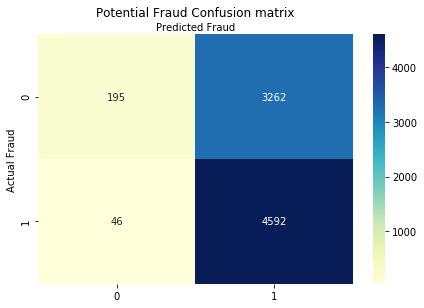

In [50]:
#random Forest Classification 10-fold cross-validation

RfPipe = make_pipeline(RandomForestClassifier())
RfParams = [
    {
         'randomforestclassifier__n_estimators': [100, 200, 500],
         'randomforestclassifier__max_depth': [5,10,15,20,30],
         'randomforestclassifier__random_state':[101],
         'randomforestclassifier__n_jobs':[-1]
     }
]

RfGrid = testPerformance(RfPipe, RfParams)


/home/dustin/anaconda3/envs/DS7331/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



grid time:  1902.4362271429854


,params,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'kneighborsclassifier__leaf_size': 10, 'kneig...",0.043084,0.530786,0.540380,0.592964,0.641634,0.616248
36,"{'kneighborsclassifier__leaf_size': 30, 'kneig...",0.055543,0.530786,0.540380,0.592964,0.641634,0.616248
24,"{'kneighborsclassifier__leaf_size': 30, 'kneig...",0.115044,0.530786,0.540380,0.592964,0.641634,0.616248
12,"{'kneighborsclassifier__leaf_size': 10, 'kneig...",0.113429,0.530786,0.540380,0.592964,0.641634,0.616248
1,"{'kneighborsclassifier__leaf_size': 10, 'kneig...",0.092954,0.533643,0.540457,0.593016,0.641770,0.616339
37,"{'kneighborsclassifier__leaf_size': 30, 'kneig...",0.095304,0.533643,0.540457,0.593016,0.641770,0.616339
25,"{'kneighborsclassifier__leaf_size': 30, 'kneig...",0.165504,0.533643,0.540457,0.593016,0.641770,0.616339
13,"{'kneighborsclassifier__leaf_size': 10, 'kneig...",0.070018,0.533643,0.540457,0.593016,0.641770,0.616339
2,"{'kneighborsclassifier__leaf_size': 10, 'kneig...",0.099214,0.536753,0.547807,0.594659,0.672258,0.631018
26,"{'kneighborsclassifier__leaf_size': 30, 'kneig...",0.063379,0.536753,0.547807,0.594659,0.672258,0.631018



10-fold Cross Validation results:
---------------------------------
F1 scores: [0.71971212 0.7223114  0.71681416 0.71504715 0.71388102 0.71526379
 0.7131655  0.72953451 0.70446321 0.74235808]

Precision scores [0.56782334 0.57544757 0.56969309 0.58133333 0.56647399 0.56238125
 0.57638426 0.58645161 0.54852849 0.60051381]

Recall scores [0.98253275 0.96982759 0.96637744 0.9286475  0.96498906 0.98230088
 0.93506494 0.96496815 0.98426966 0.97193347]

Average F1:  0.7192550930052576
Min F1:  0.7044632086851628
Max F1:  0.74235807860262

Average Precision:  0.5735030753141834
Min Precision:  0.5485284909204758
Max Precision:  0.6005138086062941

Average Recall:  0.9650911441805977
Min Recall:  0.9286474973375932
Max Recall:  0.9842696629213483

Single Run results:
---------------------------------
Accuracy: 0.5743051266213712
Precision: 0.5743142144638403
Recall: 0.9931004743423889
F1: 0.7277610996997945

Fit time:  0.00567118899198249
CV time:  3.8818543720408343
Total time:  11.071164189

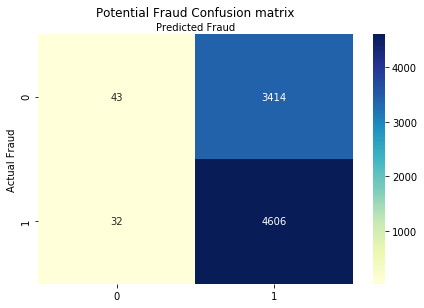

In [23]:
#KNN Classification 10-fold cross-validation

KnnPipe = make_pipeline(KNeighborsClassifier())
KnnParams = [
    {
         'kneighborsclassifier__weights': ['uniform','distance'],
         'kneighborsclassifier__leaf_size': [10,30],
         'kneighborsclassifier__metric': ['minkowski','euclidean'],
         'kneighborsclassifier__n_neighbors':[3,5,13,15,round(sqrt(X_train.shape[0])),round(sqrt(len(ipdata)))],
         'kneighborsclassifier__n_jobs':[-1]
    }
]

KnnGrid = testPerformance(KnnPipe, KnnParams)



grid time:  43.40527008497156


,params,mean_fit_time,mean_test_roc_auc,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'kneighborsclassifier__leaf_size': 10, 'kneig...",0.030559,0.536753,0.547807,0.594659,0.672258,0.631018



10-fold Cross Validation results:
---------------------------------
F1 scores: [0.60242233 0.58404255 0.61466459 0.57770632 0.58937198 0.61644562
 0.57911733 0.6078329  0.59662091 0.60681115]

Precision scores [0.58189217 0.57668067 0.59040959 0.58144552 0.57850369 0.5922528
 0.57601713 0.59815005 0.562749   0.60245902]

Recall scores [0.62445415 0.59159483 0.64099783 0.57401491 0.60065646 0.64269912
 0.58225108 0.61783439 0.63483146 0.61122661]

Average F1:  0.5975035677298262
Min F1:  0.5777063236870311
Max F1:  0.6164456233421751

Average Precision:  0.584055964644847
Min Precision:  0.5627490039840638
Max Precision:  0.6024590163934426

Average Recall:  0.6120560835581383
Min Recall:  0.5740149094781682
Max Recall:  0.6426991150442478

Single Run results:
---------------------------------
Accuracy: 0.5560222359481162
Precision: 0.597752808988764
Recall: 0.6882276843467011
F1: 0.639807576668671

Fit time:  0.006670586997643113
CV time:  4.0582847250043415
Total time:  10.7297538500

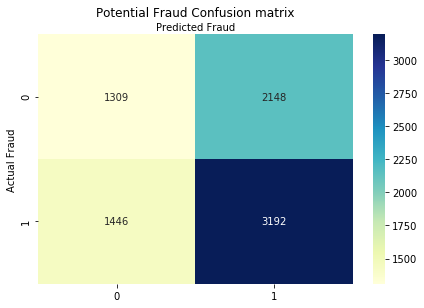

In [23]:
#KNN Classification 10-fold cross-validation

KnnPipe = make_pipeline(KNeighborsClassifier())
KnnParams = [
    {
         'kneighborsclassifier__weights': ['uniform'],
         'kneighborsclassifier__leaf_size': [10],
         'kneighborsclassifier__metric': ['minkowski'],
         'kneighborsclassifier__n_neighbors':[5],
         'kneighborsclassifier__n_jobs':[-1]
    }
]

KnnGrid = testPerformance(KnnPipe, KnnParams)


In [59]:
KnnGrid.best_estimator_

Pipeline(memory=None,
         steps=[('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=10,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [36]:
list(sorted(metrics.SCORERS.keys()))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [41]:
"""KNN Regression code"""

from sklearn.neighbors import KNeighborsRegressor

RegKnnPipe = make_pipeline(KNeighborsRegressor())
RegKnnParams = [
    {
         'kneighborsregressor__weights': ['uniform'],
         'kneighborsregressor__leaf_size': [10],
         'kneighborsregressor__metric': ['minkowski'],
         'kneighborsregressor__n_neighbors':[5],
         'kneighborsregressor__n_jobs':[-1]
    }
]

cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=86)

#Perform the grid search using accuracy as a metric during cross validation.
grid = GridSearchCV(RegKnnPipe, RegKnnParams, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
#Use the best features from recursive feature elimination during the grid search
start_time = timeit.default_timer()
grid.fit(reg_X_train, reg_y_train)
grid_time = timeit.default_timer() - start_time
#display the best pipeline model identified during the grid search
print("\ngrid time: ", grid_time)

gridResults = pd.DataFrame.from_dict(grid.cv_results_)

grid.best_estimator_



grid time:  23.31968172098277


Pipeline(memory=None,
         steps=[('kneighborsregressor',
                 KNeighborsRegressor(algorithm='auto', leaf_size=10,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=-1, n_neighbors=5, p=2,
                                     weights='uniform'))],
         verbose=False)

In [45]:
"""OLS Regression code"""

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
OLSPipe = make_pipeline(LinearRegression())
OLSParams = [
    {
         'linearregression__n_jobs':[-1]
    }
]

cv = ShuffleSplit(n_splits=10, test_size=.2, random_state=86)

#Perform the grid search using accuracy as a metric during cross validation.
grid = GridSearchCV(OLSPipe, OLSParams, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
#Use the best features from recursive feature elimination during the grid search
start_time = timeit.default_timer()
grid.fit(reg_X_train, reg_y_train)
grid_time = timeit.default_timer() - start_time
#display the best pipeline model identified during the grid search
print("\ngrid time: ", grid_time)

gridResults = pd.DataFrame.from_dict(grid.cv_results_)



grid time:  62.7144524770556


In [66]:
ypreds = grid.best_estimator_[0].predict(reg_X_test)
ypreds
reg_y_test

29642    0.0560
12132    0.2320
37347    0.2960
23817    0.0560
23549    0.0056
          ...  
7737     0.0560
4117     0.0800
36685    0.0800
19725    0.0320
10011    0.2160
Name: InscClaimAmtReimbursed, Length: 8095, dtype: float64

# Modeling and Evaluations 4

__TODO:__ Visualize results 

People don't explain 'why' which will deduct points 

Analyze how the model is performing 

Explaination is bolstered by analysis 

TIP: YellowBrick (it's a pkg) for visualizing estimators 

# Modeling and Evaluations 5

__TODO:__
Discuss advantages of models for a classification task 

Give table, how many models you built 

CV results object from grid search will give all of that information 

TIP Put in a dataframe in ME5 and then talk about 

Here's all the models we did, here is the best one (or top 3) 

Is there one that runs 10x as long and a slightly inferior runs fast 

Is the difference between models significant? 

Long method 1: Notebook #6 and use student's paired t test (at bottom), correct t value and folds 

Long method 2: generate ROC curves for each model 

If you use ROC as your eval metric, it is statistically sound measure, so if one has a larger area under curve, it is a better model statistically speaking. 

Can use micro average ROC curve with multiclass problem 

If you already did both, ask for exceptional points 

TIP: mlxtend has an 'evaluate' library for significant test 

Can get comprehensive with paired_ttest5x2cv 

Calling library and function will spit out exactly what you need 

# Modeling and Evaluations 6

__TODO:__
    Two options: 

Both tasks are on same dataset.  do two feature importance and opine difference between two 

Make sure you do feature importance on scaled data if you're using coefficients 

Use some other type of feature eval technique (mlextend library has multiple options) 

# Deployment

__TODO:__
    Address each question (in a subsection) 

2 ways to go about it 

Just because you can't predict something in the real world, doesn't necessarily mean you aren't interested in model's ability to predict 

Predict graduation rate for public schools (schools know their rates.. But they would be interested in what is correlated with grad rates) 

Maybe it's not useful for prediction, but could be used for EDA 

# Exceptional Work
### Preprocessing:
We would like credit for the large amount of preprocessing that went into our data.  We have a large variety of features in the dataset, many of which required clever feature engineering tricks to improve performance.  Conversion to the sparse matrix took a good bit of research, and continues to be an effort for implementation, since not every model or library will accept a sparse matrix.  The conversion of procedure codes and diagnosis codes from multiple columns into a one hot encoded dataframe took a significant amount of time/effort, most of the out of the box libraries we tried would not parse a list object and it took a lot of experimentation and research.  The performance improved as it reduced our total featureset footprint from > 40,000 to around 9,000.   

### Pipelines and Grid Search:
We decided to implement Pipelines and Grid Search in order to reduce the copy/paste and number of variables we need to work with.  This is a new concept barely touched on in class, and it required significant amounts of research time to implement before we could move on to model evaluation, visualization and discussion.  We determined the best approach i

# References

1. <a href="https://machinelearningmastery.com/k-fold-cross-validation/"> https://machinelearningmastery.com/k-fold-cross-validation/ </a> K-Fold Cross Validation
